In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import Cleaning_fun as CF 
#pd.options.display.max_columns=300
#pd.options.display.max_rows=300


In [2]:
# Obro tot l'arxiu per agafar-ne una mostra aleatoria,
df = pd.read_csv('../Data/train.csv')

/tmp/ipykernel_4417/3818094697.py:2: DtypeWarning: Columns (0,2,22,36,41,45,46,55,61,64,66) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../Data/train.csv')


,id,listing_url,scrape_id,last_scraped,name,description,neighborhood_overview,picture_url,host_id,host_url,...,calculated_host_listings_count_shared_rooms,reviews_per_month,last_searched,requires_license,region_id,region_name,region_parent_id,region_parent_name,region_parent_parent_id,region_parent_parent_name
0,0,https://www.airbnb.com/rooms/10942766,20211215062351,2021-12-15,B&B La Terrazza Napoli (A’ Chiesa ),Il B&B La Terrazza é un appartamento situato i...,ITALIANO/ENGLISH<br />-Siamo a pochi passi da ...,https://a0.muscache.com/pictures/c13102d9-207b...,54836997.0,https://www.airbnb.com/users/show/54836997,...,0.0,0.29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,https://www.airbnb.com/rooms/43714230,20211226165759,2021-12-27,Sunlight Maxima Villa Private Pools 24 guests,"Located in Georgioupolis, overlooking the near...","Georgioupolis is Apokoronas, with its pictures...",https://a0.muscache.com/pictures/18b0edf0-f2b9...,345934109.0,https://www.airbnb.com/users/show/345934109,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,https://www.airbnb.com/rooms/11904781,20211208225137,2021-12-09,Mini House. Take a Siesta on the Hammock on th...,"The mini-apartment, completely renovated in 20...",The street where the apartment is located is q...,https://a0.muscache.com/pictures/monet/Select-...,6956810.0,https://www.airbnb.com/users/show/6956810,...,0.0,6.08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,https://www.airbnb.com/rooms/39126878,20211207182322,2021-12-08,Cosy and design flat near Champs-Élysées,Cosy and design flat near Champs-Élysées. Perf...,Nice and safe neighborhood near the Champs-Ély...,https://a0.muscache.com/pictures/e511feba-f934...,20641177.0,https://www.airbnb.com/users/show/20641177,...,0.0,0.04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,https://www.airbnb.com/rooms/7553302,20211207182322,2021-12-08,Agréable studio,"7ème, superbe quartier vivant, à 2 pas des com...",NaN,https://a0.muscache.com/pictures/95849745/236e...,18030079.0,https://www.airbnb.com/users/show/18030079,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# agafo una mostra random,
df_sample = df.sample(5000).reset_index(drop=True)
df_sample.dropna(subset=['price'], inplace=True)
# La subdivideixo en funcio del preu

In [4]:
df_sample_lowp = df_sample[df_sample.price < 1000] # Let's take just the lower prices to observe the distribution
df_sample_highp = df_sample[df_sample.price > 1000]
df_sample_vlowp = df_sample[df_sample.price < 300]

0    60.0
Name: price, dtype: float64


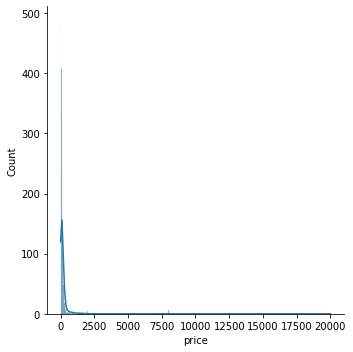

In [5]:
print(df_sample_vlowp.price.mode())
sns.displot(data=df_sample, x='price', kind='hist',kde=True) # Veiem que es una T d'student MOLT deslpaçada cam als preus baixos. 

In [7]:
CF.Clean_columns(df_sample, inpl=True)

In [8]:
df_sample.describe()

,host_listings_count,latitude,longitude,accommodates,bathrooms,beds,price,minimum_nights,minimum_minimum_nights,maximum_minimum_nights,...,review_scores_rating,review_scores_cleanliness,review_scores_checkin,review_scores_location,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,requires_license
count,4987.000000,5000.000000,5000.000000,5000.000000,1.0,4865.000000,5000.000000,5000.000000,4999.000000,4999.000000,...,3995.000000,3950.000000,3948.000000,3948.000000,4999.000000,4999.000000,4999.000000,4999.000000,3994.000000,0.0
mean,32.082013,44.663049,4.548130,3.731000,1125.0,2.391984,175.638200,23.842000,24.015003,25.120024,...,4.636991,4.687734,4.816793,4.758366,16.109822,14.410882,1.503301,0.070814,0.981012,NaN
std,197.027265,5.605052,9.231473,2.283962,NaN,1.868821,561.233884,83.612798,84.003030,84.795810,...,0.654811,0.463308,0.380662,0.368856,51.564089,50.363521,8.484877,1.360046,1.239289,NaN
min,0.000000,2.000000,-10.379970,0.000000,1125.0,1.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.010000,NaN
25%,1.000000,40.422755,-3.615685,2.000000,1125.0,1.000000,54.000000,1.000000,1.000000,2.000000,...,4.570000,4.580000,4.800000,4.670000,1.000000,1.000000,0.000000,0.000000,0.170000,NaN
50%,2.000000,43.758680,2.845780,3.000000,1125.0,2.000000,83.000000,2.000000,2.000000,3.000000,...,4.810000,4.830000,4.940000,4.870000,2.000000,1.000000,0.000000,0.000000,0.510000,NaN
75%,5.000000,48.872033,11.618313,5.000000,1125.0,3.000000,140.000000,4.000000,4.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,6.000000,4.000000,1.000000,0.000000,1.300000,NaN
max,3750.000000,55.712020,26.151170,16.000000,1125.0,30.000000,20000.000000,1125.000000,1125.000000,1125.000000,...,5.000000,5.000000,5.000000,5.000000,729.000000,726.000000,179.000000,45.000000,11.890000,NaN


In [10]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 68 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            4999 non-null   object 
 1   name                                          4996 non-null   object 
 2   description                                   4913 non-null   object 
 3   neighborhood_overview                         2948 non-null   object 
 4   host_name                                     4988 non-null   object 
 5   host_since                                    4988 non-null   object 
 6   host_location                                 4977 non-null   object 
 7   host_about                                    2702 non-null   object 
 8   host_response_time                            3276 non-null   object 
 9   host_response_rate                            3276 non-null   o

{'neighborhood_overview': 2052,
 'host_about': 2298,
 'host_response_time': 1724,
 'host_response_rate': 1724,
 'host_acceptance_rate': 1452,
 'host_neighbourhood': 2535,
 'neighbourhood': 2052,
 'neighbourhood_group_cleansed': 3654,
 'bathrooms': 4999,
 'calendar_updated': 4999,
 'first_review': 1005,
 'last_review': 1005,
 'review_scores_rating': 1005,
 'review_scores_accuracy': 1051,
 'review_scores_cleanliness': 1050,
 'review_scores_checkin': 1052,
 'review_scores_communication': 1052,
 'review_scores_location': 1052,
 'review_scores_value': 1052,
 'reviews_per_month': 1006,
 'last_searched': 4761,
 'requires_license': 5000}

In [28]:
lista_UV = []
for col in CF.num_NaNs(df_sample, n=1000):
    lista_UV.append((df_sample[col].unique(), col))
lista_UV[2]
df_sample[df_sample.host_response_time == 'within a day'].count()

id                                              489
name                                            489
description                                     481
neighborhood_overview                           281
host_name                                       489
                                               ... 
calculated_host_listings_count_private_rooms    489
calculated_host_listings_count_shared_rooms     489
reviews_per_month                               396
last_searched                                    33
requires_license                                  0
Length: 68, dtype: int64

In [30]:
# Let's also take a look on the test we are gonna use,
test = pd.read_csv('../Data/test.csv')


/tmp/ipykernel_4417/3964635950.py:2: DtypeWarning: Columns (0,2,22,40,44,45,54,60,63,65) have mixed types. Specify dtype option on import or set low_memory=False.
  test = pd.read_csv('../Data/test.csv')


In [32]:
CF.Clean_columns(test).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 87922 entries, 0 to 87921
Data columns (total 67 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            87917 non-null  object 
 1   name                                          87889 non-null  object 
 2   description                                   86405 non-null  object 
 3   neighborhood_overview                         51448 non-null  object 
 4   host_name                                     87776 non-null  object 
 5   host_since                                    87776 non-null  object 
 6   host_location                                 87596 non-null  object 
 7   host_about                                    46620 non-null  object 
 8   host_response_time                            57263 non-null  object 
 9   host_response_rate                            57261 non-null 